In [8]:
import os
os.getcwd()

'/home/jay'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
x=df.iloc[:,3:]

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


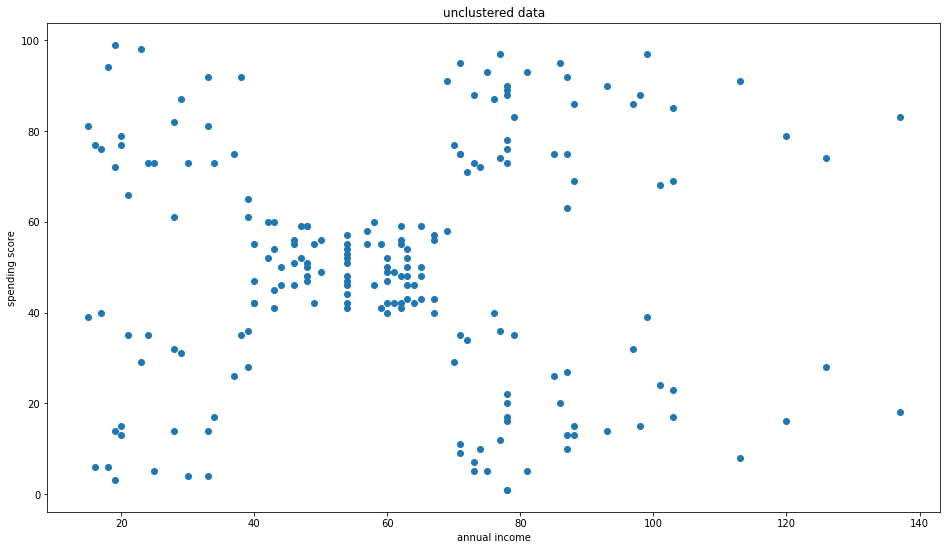

In [14]:
plt.figure(figsize=(16,9))
plt.title('unclustered data')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [15]:
from sklearn.cluster import KMeans, AgglomerativeClustering
km=KMeans(n_clusters=3)
km.fit_predict(x)

/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [19]:
sse=[]
for k in range (1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

In [20]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30227.606513152008,
 25005.934805966197,
 21826.93630323166,
 19646.482018947238,
 17511.7418692661,
 16317.40282952342,
 14503.349322437605,
 12797.180630643863,
 11989.283377896612]

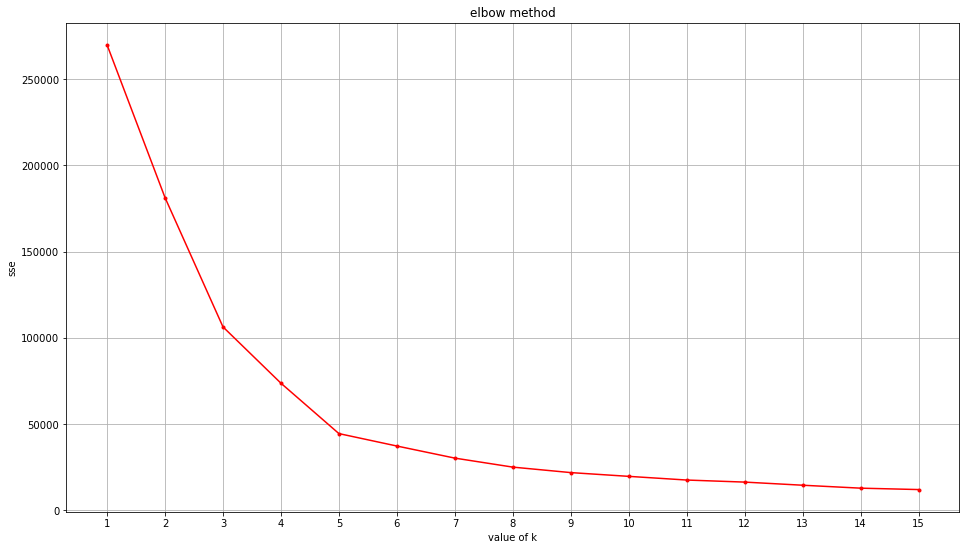

In [21]:
plt.figure(figsize=(16,9))
plt.title('elbow method')
plt.xlabel('value of k')
plt.ylabel('sse')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red')

In [22]:
from sklearn.metrics import silhouette_score
silh=[]
for k in range (2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)


/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

In [23]:
silh


[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5281944387251989,
 0.45732611752686836,
 0.457462901394195,
 0.44844327163062,
 0.4365404190061802,
 0.4261179818623365,
 0.4253698280154674,
 0.4287654751715641,
 0.4198616506694438]

<BarContainer object of 14 artists>

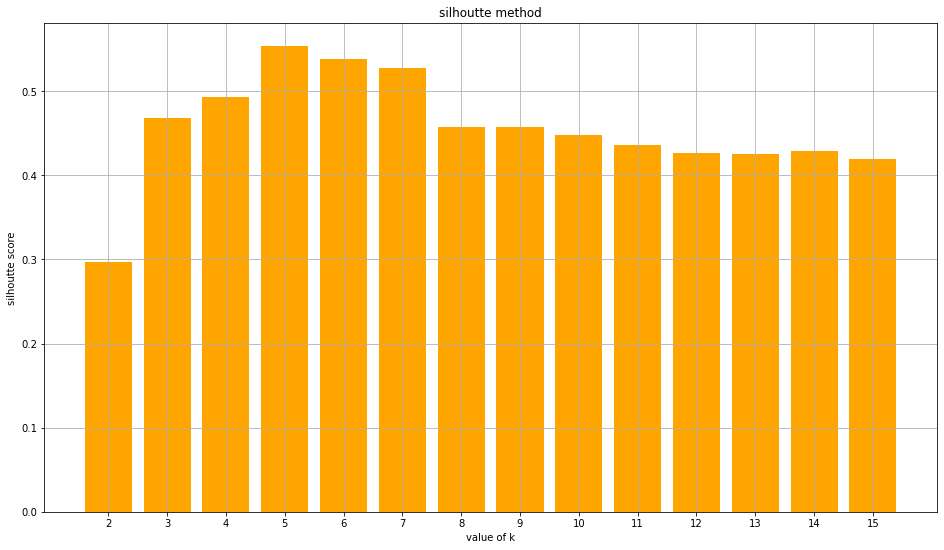

In [24]:
plt.figure(figsize=(16,9))
plt.title('silhoutte method')
plt.xlabel('value of k')
plt.ylabel('silhoutte score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color='orange')

In [26]:
km=KMeans(n_clusters=5, random_state=0)

In [27]:
labels=km.fit_predict(x)


/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [29]:
cent=km.cluster_centers_

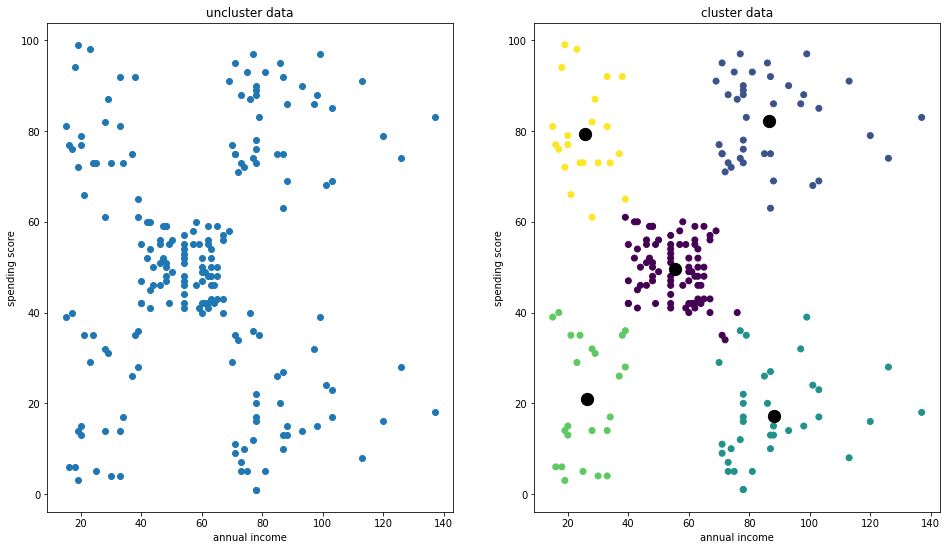

In [30]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('uncluster data')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.subplot(1,2,2)
plt.title('cluster data')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=150,color='k')

In [31]:
km.inertia_

44448.4554479337

In [32]:
four=df[labels==4]

In [33]:
four.to_csv('mydata.csv')


In [34]:
km.predict([[56,61]])

/home/jay/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [35]:
agl=AgglomerativeClustering(n_clusters=5)
alabels=km.fit_predict(x)
alabels

/home/jay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

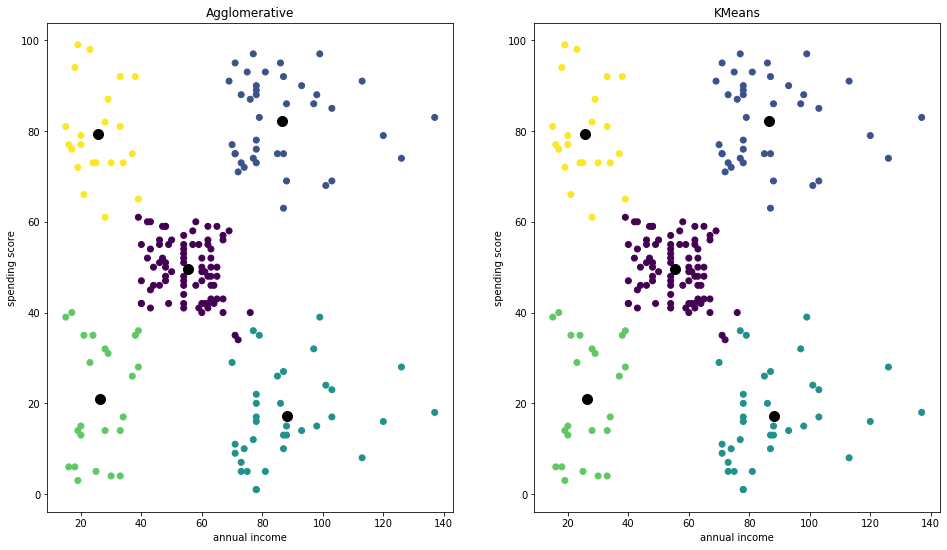

In [42]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='k')
plt.subplot(1,2,2)
plt.title('KMeans')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='k')